<a href="https://colab.research.google.com/github/jeffersonverissimo/Data_Science/blob/master/Predi%C3%A7%C3%A3o_de_Casos_da_COVID_19_usando_o_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://2s7gjr373w3x22jf92z99mgm5w-wpengine.netdna-ssl.com/wp-content/uploads/2020/02/coronavirus-scaled.jpg)

---
# **PREDIÇÃO DOS CASOS DA COVID-19 USANDO MACHINE LEARNING**

---
---

Atualmente, o novo coronavírus já infectou mais de 700 mil pessoas em todo o mundo, causando pouco mais de 37 mil mortes. E esse cenário tende a piorar em alguns países ao longo das próximas semanas. As pessoas idosas e as que têm doenças crônicas, como hipertensão ou problemas cardíacos e diabetes, possuem maior probabilidade de desenvolver doenças graves.

**Uso da Inteligência Artificial na Guerra contra o Coronavírus**

Diante desse cenário, a Inteligência Artificial surge como uma das maiores armas contra a pandemia do coronavírus. Os diversos algoritmos criados usando técnicas de IA podem nos ajudar a entender o comportamento e as projeções para o avanço da pandemia, assim como detectar casos, determinar prioridades de atendimentos no sistema de saúde e encontrar possíveis remédios e tratamentos para frear o coronavírus.

No que diz respeito ao uso de técnicas e ferramentas específicas de *Machine Learning*, os principais *frameworks* de IA, que são usados para acelerar os projetos na luta contra o vírus são abertos, como *TensorFlow*, *Keras*, *Torch* e outros.

**Proposta deste Projeto**

O presente *notebook* mostra uma análise preditiva baseada nos dados epidemiológicos do coronavírus disponibilizados pela *Johns Hopkins University* através do seu [repositório no *GitHub*](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). A partir de técnicas de *Machine Learning*, é apresentada uma previsão do comportamento global da pandemia da COVID-19 considerando alguns cenários temporais.

**Metodologia Utilizada**

A análise deste projeto foi realizada utilizando uma ferramenta para Python desenvolvida pelo Facebook, o **Prophet**, que nos permite fazer previsões a partir de um determinado conjunto de dados. Você pode conferir os detalhes sobre esta ferramenta neste [link](https://facebook.github.io/prophet/).

<center><img alt="Analisando Airbnb" width="20%" src="https://nextjournal.com/data/QmQfcfJDCwjxdNPMRTJZGbS8duREqmNXM7mVhXYcr3KPGE?content-type=image%2Fpng&filename=prophet-logo.png"></center>


---

## **AQUISIÇÃO DOS DADOS**

Todos os dados usados neste *notebook* foram obtidos a partir do repositório da *Johns Hapkins University* no *Github*, que você pode acessar através deste [link](https://github.com/CSSEGISandData).

Para esta análise exploratória inicial, serão utilizados apenas os seguintes arquivos:

*   *`time_series_covid19_confirmed_global.csv`*
*   *`time_series_covid19_deaths_global.csv`*
*   *`time_series_covid19_recovered_global.csv`*

In [0]:
# IMPORTAÇÃO DOS PACOTES NECESSÁRIOS PARA REALIZAR AS ANÁLISES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# IMPORTAÇÃO DOS CONJUNTOS DE DADOS A SEREM ANALISADOS

# Casos de Infecção Confirmados de COVID-19
df1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# Casos de Mortes Confirmadas de COVID-19
df2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Casos de Pessoas Recuperadas da COVID-19
df3 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

Inicialmente, as informações sobre casos confirmados, mortes e casos de recuperação, estão em *datasets* separados, em df1, df2 e df3, respectivamente.

Com isso, iremos fazer um tratamento nos conjuntos de dados de forma a agrupar todas essas informações e obter um novo *dataset* contendo todas as informações necessárias para a análise e de maneira mais organizada.

---

## **TRATAMENTO DOS DADOS**

In [0]:
# CRIANDO OS NOVOS DATAFRAMES

confir = np.sum(df1.iloc[:,4:df1.shape[1]])
confir.index = pd.DatetimeIndex(confir.index)

mortes = np.sum(df2.iloc[:,4:df2.shape[1]])
mortes.index = pd.DatetimeIndex(mortes.index)

recup = np.sum(df3.iloc[:,4:df3.shape[1]])
recup.index = pd.DatetimeIndex(recup.index)

In [123]:
# CRIANDO UM DATAFRAME COM TODOS OS CASOS OCORRIDOS

df_total = pd.concat([confir,mortes,recup], axis=1).reset_index()
df_total.columns = ['Data','Casos_Confirmados','Mortes_Confirmadas','Pacientes_Recuperados']
df_total.tail()

,Data,Casos_Confirmados,Mortes_Confirmadas,Pacientes_Recuperados
65,2020-03-27,593291,27198,130915
66,2020-03-28,660706,30652,139415
67,2020-03-29,720117,33925,149082
68,2020-03-30,782365,37582,164566
69,2020-03-31,857487,42107,178034


Agora, temos um dataframe contendo todos as informações desejadas, organizadas por data do evento.

---

### **PLOTANDO O GRÁFICO DE CASOS CONFIRMADOS E MORTES AO LONGO DO TEMPO**

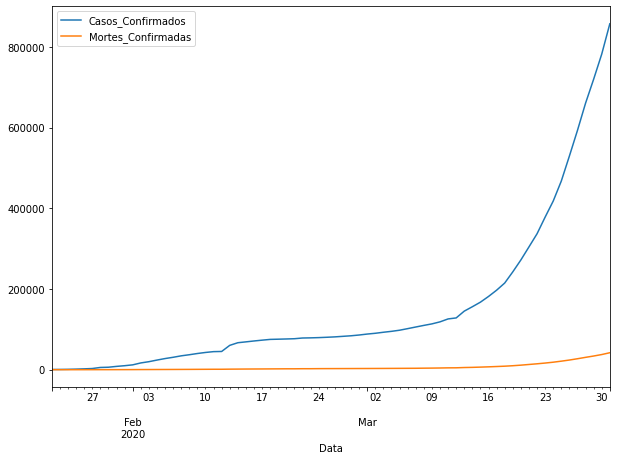

In [124]:
df_total.plot('Data',['Casos_Confirmados','Mortes_Confirmadas'],figsize=(10,7));

---

## **ANÁLISE COM O PROPHET**

O Prophet trabalha com formatos específicos de colunas. 
Neste caso, devemos fornecer as informações nos seguintes padrões: **ds** e **y**
A coluna **ds** deve estar no formato **AAAA-MM-DD** para datas e a coluna **y** deve ser **numérica**, esta representa a medida que deseja-se prever.

Assim, para implementar a ferramenta Prophet na nossa análise, deveremos escolher um único parâmetro para ser avaliado em relação ao tempo. Neste caso, devemos gerar um novo *dataset* e renomear as colunas para **ds** e **y**.

In [0]:
# IMPORTANDO O PROPHET

from fbprophet import Prophet

Neste *notebook*, iremos avaliar o número de mortes e usar o Prophet para tentar prever o comportamento dessa variável.

In [126]:
# CRIANDO UM DATASET COM AS INFORMAÇÕES: DATA E MORTES CONFIRMADAS

prophet_mortes = df[['Data','Mortes_Confirmadas']]
prophet_mortes.columns = ['ds','y']
prophet_mortes.head()

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


Com o nosso *dataframe* no devido formato, podemos montar a nossa previsão usando o Prophet.

### **PREVISÃO GLOBAL DE MORTES DA COVI-19**

Iremos realizar as análises adotando um **intervalor de confiança de 95%**.

Admitir um determinado intervalo de confiança é essencial na análise de dados em Séries Temporais, uma vez que as tendências temporais dos dados mudam constantemente. Ou seja, devemos assumir que o futuro sofrerá mudanças. Nesta análise, assumiremos um **erro de 5%**.

In [0]:
# CRIANDO A INSTÂNCIA DO PROPHET

m = Prophet(interval_width=0.95, yearly_seasonality=False, daily_seasonality=False) # SAZONALIDADES ANUAL E DIÁRIAS IGNORADAS

# Treinamento
# Neste caso, podemos passar todo o dataframe, ao invés de dividir em treino e teste

m.fit(prophet_mortes)

# Quantidade de dias desejados
dias = 20

futuro_mortes = m.make_future_dataframe(periods = dias)

In [128]:
# VISUALIZANDO OS DIAS DE PREVISÃO GERADOS

futuro_mortes.tail(dias)

,ds
70,2020-04-01
71,2020-04-02
72,2020-04-03
73,2020-04-04
74,2020-04-05
75,2020-04-06
76,2020-04-07
77,2020-04-08
78,2020-04-09
79,2020-04-10


Perceba que, no dataframe **prophet_mortes** (antes de gerar os dias de previsão), a última data era 2020-03-31.
Agora, temos até o dia 2020-04-15, ou seja, **15 dias** depois, como especificado.

**E isso também pode ser feito para mais dias.**

In [129]:
# GERANDO DATAFRAME COM PREVISÕES DO PROPHET

previsao_mortes = m.predict(futuro_mortes)

# Visualizando o dataframe gerado

previsao_mortes.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
70,2020-04-01,38952.024127,36735.660439,40978.300725,38858.799543,39033.102845,-150.063213,-150.063213,-150.063213,-150.063213,-150.063213,-150.063213,0.0,0.0,0.0,38801.960914
71,2020-04-02,41159.536736,38941.713133,43079.748378,40879.375700,41441.131132,-213.567672,-213.567672,-213.567672,-213.567672,-213.567672,-213.567672,0.0,0.0,0.0,40945.969065
72,2020-04-03,43367.049346,41163.722989,45231.613394,42874.503040,43839.650309,-161.928393,-161.928393,-161.928393,-161.928393,-161.928393,-161.928393,0.0,0.0,0.0,43205.120952
73,2020-04-04,45574.561955,43336.119595,47692.220467,44749.613608,46277.125704,-78.690572,-78.690572,-78.690572,-78.690572,-78.690572,-78.690572,0.0,0.0,0.0,45495.871384
74,2020-04-05,47782.074564,45438.557755,49979.578531,46700.741008,48757.642526,3.895393,3.895393,3.895393,3.895393,3.895393,3.895393,0.0,0.0,0.0,47785.969957
75,2020-04-06,49989.587174,47686.010837,52496.160140,48588.956480,51202.525124,158.814148,158.814148,158.814148,158.814148,158.814148,158.814148,0.0,0.0,0.0,50148.401322
76,2020-04-07,52197.099783,50112.209011,55318.768685,50511.065247,53828.996906,441.540308,441.540308,441.540308,441.540308,441.540308,441.540308,0.0,0.0,0.0,52638.640091
77,2020-04-08,54404.612392,51493.265750,56945.486708,52406.321458,56362.997041,-150.063213,-150.063213,-150.063213,-150.063213,-150.063213,-150.063213,0.0,0.0,0.0,54254.549179
78,2020-04-09,56612.125002,53052.847471,59434.038285,54215.700596,58967.065989,-213.567672,-213.567672,-213.567672,-213.567672,-213.567672,-213.567672,0.0,0.0,0.0,56398.557330
79,2020-04-10,58819.637611,55254.269645,61999.194333,56028.005686,61520.032048,-161.928393,-161.928393,-161.928393,-161.928393,-161.928393,-161.928393,0.0,0.0,0.0,58657.709218


As variáveis mais importantes para nós, neste momento, são:

*   **ds** (dias)
*   **yhat_lower** (previsão do número mínimo de mortes)
*   **yhat_upper** (previsão do número máximo de mortes)
*   **yhat** (previsão do número médio de mortes)

A partir dessas variáveis, podemos gerar os gráficos para enterdermos a previsão feita pelo Prophet.

Assim, devemos gerar um novo dataframe com essas variáveis e plotar um gráfico.

In [130]:
# DATAFRAME - PREVISÃO

previsao_prophet = previsao_mortes[['ds','yhat_lower','yhat','yhat_upper']]
previsao_prophet.tail(7)

,ds,yhat_lower,yhat,yhat_upper
83,2020-04-14,62969.329110,68091.228357,72732.483692
84,2020-04-15,64531.317299,69707.137445,75202.064988
85,2020-04-16,65955.979757,71851.145596,77010.581455
86,2020-04-17,67958.162565,74110.297483,80021.902536
87,2020-04-18,69799.579259,76401.047914,83250.243063
88,2020-04-19,71449.385524,78691.146488,86117.703244
89,2020-04-20,73232.456221,81053.577853,88673.163964


### **PLOTANDO O GRÁFICO COM AS PREVISÕES**

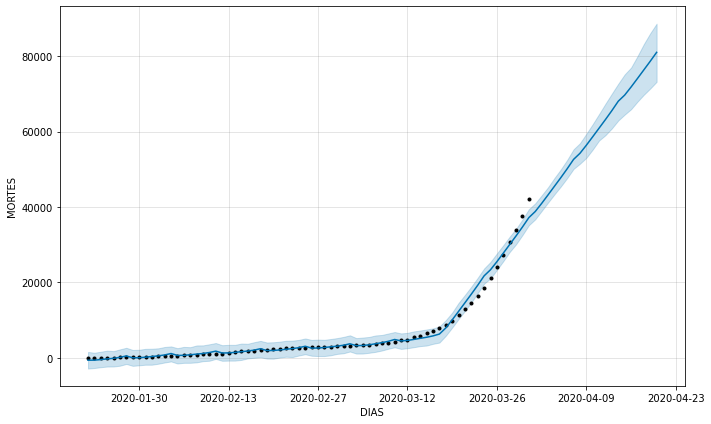

In [133]:
# PREVISÃO PARA 15 DIAS

confirmed_forecast_plot = m.plot(previsao_prophet, xlabel = 'DIAS', ylabel = 'MORTES')

O gráfico gerado acima nos mostra os dados atuais (bolinhas pretas), a previsão do Prophet (linha azul) e a margem para mínimo e máximo (faixa azul claro).

### **CONCLUSÕES**

Podemos concluir que o Prophet conseguiu prever de maneira precisa o comportamento das mortes até o dia atual. Com isso, podemos admitir que o número de mortes previstas em todo o mundo esteja dentro da faixa da previsão.

De acordo com o modelo, a previsão do número de mortes até o dia 15-04-2020 podemos ser:

*   Número mínimo de mortes: **73232**
*   Número médio de mortes: **81053**
*   Número mínimo de mortes: **88673**

Com isso, percebemos que os prováveis cenários para o número de mortes total ainda é bem preocupante. Desta forma, devemos seguir as recomendações dos órgãos de saúde, da maneria mais rigorosa possível, para evitar que esses números cresçam.

A IA está sendo usada neste frequentemente utilizida e alguns experimentos já mostram a eficácia de algoritmos de Deep Learning nesta guerra contra a COVID-19.

